Mean: 122.73287507292576
Median: 120.580002
Mode: [115.940002]
Standard Deviation: 23.283345747117536
Variance: 542.1141891798162
Absolute Median Deviation: 17.46734672183406
Absolute Mean Deviation: 17.63647005080185
Skewness: 0.3339194395208868
 


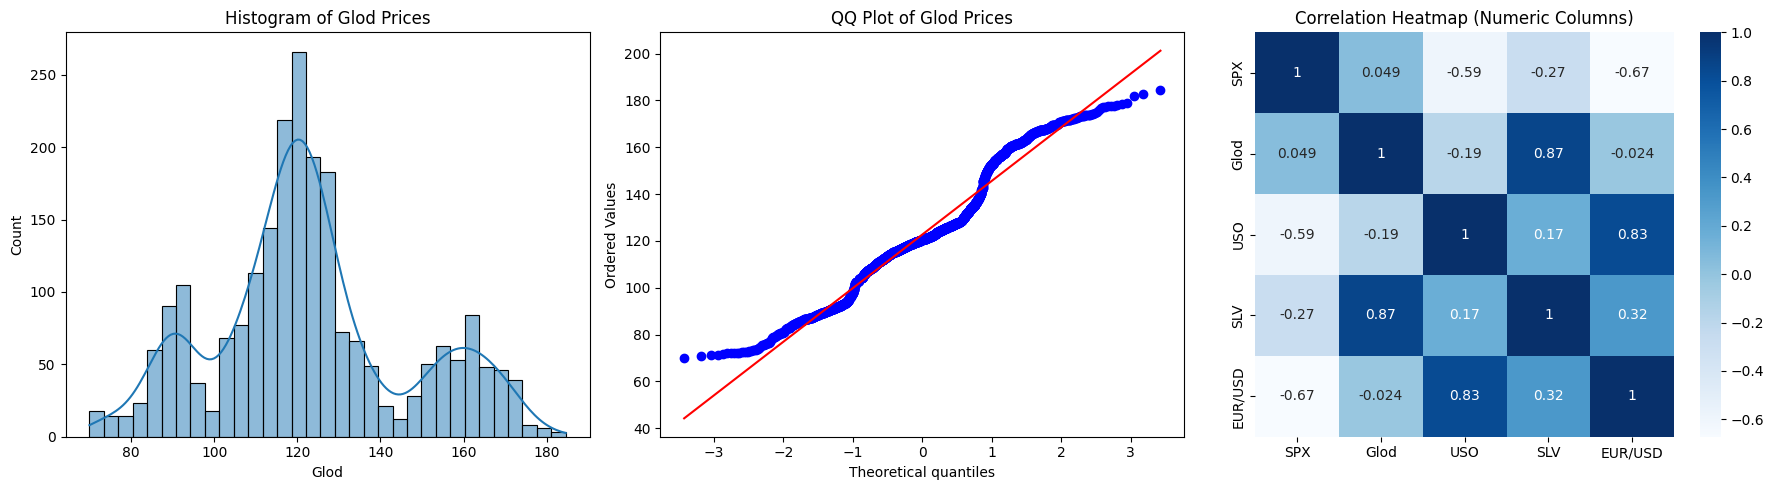

,Asset,Total_Value
0,SPX,3.788383e+06
1,Glod,2.810583e+05
2,USO,7.291869e+04
3,SLV,4.599464e+04
4,EUR/USD,2.939565e+03


,Parent,Labels,Values
0,None,Total,4.191294e+06
1,Total,SPX,3.788383e+06
2,Total,Glod,2.810583e+05
3,Total,USO,7.291869e+04
4,Total,SLV,4.599464e+04


Table


,Date,SPX,Glod,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [7]:

import pandas as pd
import numpy as np
from scipy.stats import skew
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import plotly.express as px


df = pd.read_csv('/gld_price_data.csv')

gld_mean = df['Glod'].mean()
gld_median = df['Glod'].median()
gld_mode = df['Glod'].mode().tolist()
gld_std = df['Glod'].std()
gld_variance = df['Glod'].var()
gld_median_value = df['Glod'].median()
gld_mad = np.mean(np.abs(df['Glod'] - gld_median_value))
gld_amd = np.mean(np.abs(df['Glod'] - np.mean(df['Glod'])))
gld_skewness = skew(df['Glod'])


print(f"Mean: {gld_mean}")
print(f"Median: {gld_median}")
print(f"Mode: {gld_mode}")
print(f"Standard Deviation: {gld_std}")
print(f"Variance: {gld_variance}")
print(f"Absolute Median Deviation: {gld_mad}")
print(f"Absolute Mean Deviation: {gld_amd}")
print(f"Skewness: {gld_skewness}")


fig, axes = plt.subplots(1, 3, figsize=(18, 5)) # Added a third subplot for the heatmap

sns.histplot(df['Glod'], kde=True, ax=axes[0])
axes[0].set_title('Histogram of Glod Prices')

stats.probplot(df['Glod'], dist="norm", plot=axes[1])
axes[1].set_title('QQ Plot of Glod Prices')

# Remove the 'Date' column as it is not numeric
df_numeric = df.drop('Date', axis=1)
print(" ")
# Calculate and plot the correlation heatmap on the third subplot
sns.heatmap(df_numeric.corr(), annot=True, cmap='Blues', ax=axes[2])
axes[2].set_title('Correlation Heatmap (Numeric Columns)')


plt.tight_layout()
plt.show()

%pip install plotly

packed_bubble_data = df_numeric.sum().reset_index()
packed_bubble_data.columns = ['Asset', 'Total_Value']

treemap_data = pd.DataFrame({
    'Parent': ['Total'] * len(df_numeric.columns),
    'Labels': df_numeric.columns,
    'Values': df_numeric.sum().values
})
treemap_data = pd.concat([pd.DataFrame({'Parent': [None], 'Labels': ['Total'], 'Values': [df_numeric.sum().sum()]}), treemap_data], ignore_index=True)

display(packed_bubble_data.head())
display(treemap_data.head())

fig_treemap = px.treemap(treemap_data, names='Labels', parents='Parent', values='Values', title='Treemap of Asset Values',
                         hover_data=['Labels', 'Parent', 'Values'])
fig_treemap.show()

fig_bubble = px.scatter(packed_bubble_data, x='Asset', y='Total_Value', size='Total_Value', color='Asset',
                        title='Packed Bubble Chart of Asset Values',
                        hover_name='Asset', hover_data=['Total_Value'])
fig_bubble.show()
print("Table")
df.head()